In [6]:
import pandas as pd
import json
from PIL import Image
import urllib.request
from pathlib import Path

base image size (w, h): (750, 420)


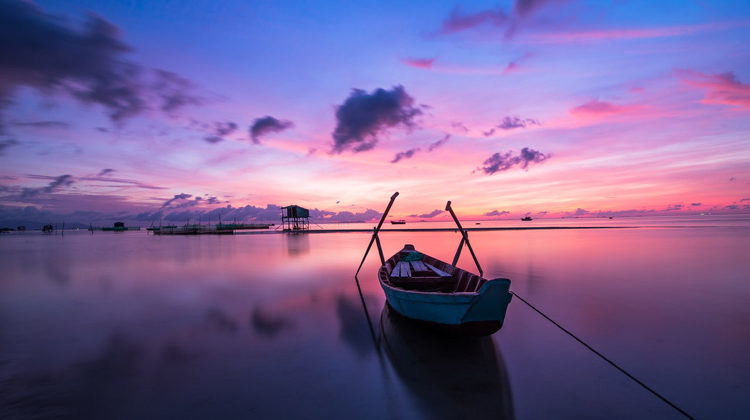

In [7]:
'''Base Images

Assumptions:
- 1 participant
- 1 image
'''
# Import base image
base_img_path = Path.cwd().parent / 'data' / 'base' / 'Files_ImageUploadAndAnnota' / 'Files_ImageUploadAndAnnota' /'documents' / '2_img_view_1.jpeg'
base_img = Image.open(base_img_path)
print(f"base image size (w, h): {base_img.size}")
display(base_img)

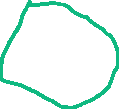

In [14]:
'''Annotations

Assumptions:
- 1 participant
- 1 image
- 2 annotations

Ref. for free hand properties (https://markerjs.com/reference/interfaces/freehandmarkerstate.html)
'''
# Import csv file as a dataframe
annot_path = Path.cwd().parent / 'data' / 'annotation' / 'ImageUploadAndAnnota_DATA.csv'
df_annot = pd.read_csv(annot_path)
# Get annotation data
annot_cols = [
    'img_annotate_1',
    'img_annotate_2']
annot_dict = {col: df_annot[col].iloc[0] for col in annot_cols}
# Clean annotation data and add Image object
annot_all_clean_dict = {}
for annot_name, annot_data in annot_dict.items():
    # Convert string JSON into dictionary
    annot_clean_dict = json.loads(annot_data)
    # Convert data imge url to image
    annot_url = annot_clean_dict['markers'][0]['drawingImgUrl']
    annot_img = Image.open(urllib.request.urlopen(annot_url))
    # Update
    annot_clean_dict['annot_img'] = annot_img
    annot_all_clean_dict[annot_name] = annot_clean_dict
# Show test annotation
display(annot_all_clean_dict['img_annotate_1']['annot_img'])

GT REDCap image and annotation


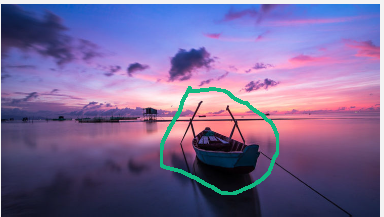

Test image and annotation


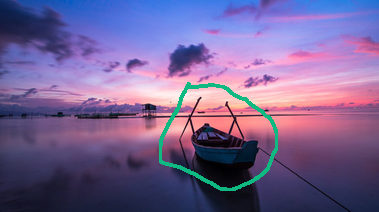

In [12]:
''' Testing

Test if downloaded images and annotations match REDCap
'''
# Get ground truth (GT) image screenshot 
gt_base_annot = Image.open(Path.cwd().parent / 'data' / 'test' / 'base_annotate_1.png')
print("GT REDCap image and annotation")
display(gt_base_annot)
# Get base image
base_img_path = Path.cwd().parent / 'data' / 'base' / 'Files_ImageUploadAndAnnota' / 'Files_ImageUploadAndAnnota' /'documents' / '2_img_view_1.jpeg'
base_img = Image.open(base_img_path)
# Get annotation
annot_img_dict = annot_all_clean_dict['img_annotate_1']
annot_img = annot_img_dict['annot_img']
# Resize base image to size saved by annotation
new_size = (annot_img_dict['width'], annot_img_dict['height'])
base_img = base_img.resize(new_size, Image.ANTIALIAS)
# Align the testing image and annotation such that it matches the GT
left_align = annot_img_dict['markers'][0]['left']
top_align = annot_img_dict['markers'][0]['top']
base_img.paste(annot_img, (left_align, top_align), annot_img)
print("Test image and annotation")
display(base_img)